In [17]:
project_name = 'full_fine_tuning_5epochs_final1'

datas=( 'stanford_cars', 'caltech101', 'fgvc-aircraft-2013b', 'dtd', 'flowers-102', 'oxford-iiit-pet'  ) #'imagenette2' 'eurosat' 

losses=( 'TRADES_v2', 'CLASSIC_AT' ) #  

backbones=(
  'convnext_tiny', 'robust_convnext_tiny', 'convnext_tiny.fb_in22k', 
  'deit_small_patch16_224.fb_in1k', 'robust_deit_small_patch16_224',
  'convnext_base', 'convnext_base.fb_in22k', 'robust_convnext_base', 
  'convnext_base.clip_laion2b', 'convnext_base.clip_laion2b_augreg',
  'vit_base_patch16_224.augreg_in1k', 'vit_base_patch16_224.augreg_in21k',
  'vit_base_patch16_224.dino', 'vit_base_patch16_224.mae', 'vit_base_patch16_224.orig_in21k',
  'vit_base_patch16_224.sam_in1k', 'vit_base_patch16_224_miil.in21k'  ) 


import pickle
import numpy as np

final_data = []

for backbone in backbones:
    for loss in losses:
        for data in datas:

            try:

                name ='{}_{}_{}'.format(backbone, data, loss)
                with open('./results/results_{}_{}_{}_{}.pkl'.format(project_name, backbone, data, loss), 'rb') as f:
                    saved_data = pickle.load(f)
                    result = saved_data[name]["statistics"]
                    result['backbone'] = backbone
                    result['dataset'] = data
                    result['loss_function'] = loss    

                    # print(name, data[name]["statistics"])
            except:
                result = {}
                result['backbone'] = backbone
                result['dataset'] = data
                result['loss_function'] = loss   
                result['clean_acc'] = np.nan
                result['robust_acc'] = np.nan 
                # print('not available')

            final_data.append(result)



In [18]:
import pandas as pd

df = pd.DataFrame(final_data)

In [ ]:


# Pivot the table to group by 'backbone' and 'loss_function' in rows and create a hierarchical structure with 'dataset' as column index
grouped_df = df.pivot_table(
    index=['backbone', 'loss_function'], 
    columns='dataset', 
    values=['clean_acc', ], #'robust_acc'
    dropna=False
)

grouped_df

clean_acc            \
dataset                                         caltech101       dtd   
backbone                          loss_function                        
convnext_base                     CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
convnext_base.clip_laion2b        CLASSIC_AT           NaN  0.562667   
                                  TRADES_v2            NaN       NaN   
convnext_base.clip_laion2b_augreg CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
convnext_base.fb_in22k            CLASSIC_AT           NaN  0.714000   
                                  TRADES_v2            NaN       NaN   
convnext_tiny                     CLASSIC_AT           NaN  0.508000   
                                  TRADES_v2            NaN  0.490000   
convnext_tiny.fb_in22k            CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
deit_small_patch16_224.fb_in1k    CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
robust_convnext_base              CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN  0.458667   
robust_convnext_tiny              CLASSIC_AT           NaN  0.510000   
                                  TRADES_v2            NaN  0.460000   
robust_deit_small_patch16_224     CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
vit_base_patch16_224.augreg_in1k  CLASSIC_AT           NaN  0.530667   
                                  TRADES_v2            NaN  0.534667   
vit_base_patch16_224.augreg_in21k CLASSIC_AT           NaN  0.530667   
                                  TRADES_v2            NaN  0.416667   
vit_base_patch16_224.dino         CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
vit_base_patch16_224.mae          CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN  0.333333   
vit_base_patch16_224.orig_in21k   CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN       NaN   
vit_base_patch16_224.sam_in1k     CLASSIC_AT           NaN       NaN   
                                  TRADES_v2            NaN  0.608667   
vit_base_patch16_224_miil.in21k   CLASSIC_AT           NaN  0.269333   
                                  TRADES_v2            NaN       NaN   

                                                                     \
dataset                                         fgvc-aircraft-2013b   
backbone                          loss_function                       
convnext_base                     CLASSIC_AT               0.117333   
                                  TRADES_v2                     NaN   
convnext_base.clip_laion2b        CLASSIC_AT               0.304667   
                                  TRADES_v2                0.465333   
convnext_base.clip_laion2b_augreg CLASSIC_AT               0.290667   
                                  TRADES_v2                     NaN   
convnext_base.fb_in22k            CLASSIC_AT                    NaN   
                                  TRADES_v2                     NaN   
convnext_tiny                     CLASSIC_AT               0.063333   
                                  TRADES_v2                0.144667   
convnext_tiny.fb_in22k            CLASSIC_AT               0.185333   
                                  TRADES_v2                     NaN   
deit_small_patch16_224.fb_in1k    CLASSIC_AT                    NaN   
                                  TRADES_v2                     NaN   
robust_convnext_base              CLASSIC_AT               0.210000   
                                  TRADES_v2                     NaN   
robust_convnext_tiny              C

In [25]:
import comet_ml

import os
os.environ["COMET_API_KEY"] = "I5AiXfuD0TVuSz5UOtujrUM9i"

PROJECT_NAME="full-fine-tuning-5epochs-final1"
WORKSPACE_NAME="maxheuillet"

# Get all Experiemnts in workspace
api = comet_ml.API()

# all_experiments_in_workspace = api.get_experiments(WORKSPACE_NAME)
all_experiments_in_project = api.get_experiments(WORKSPACE_NAME, PROJECT_NAME)


In [26]:
backbones = [
  "convnext_tiny", "robust_convnext_tiny", "convnext_tiny.fb_in22k", 
  "deit_small_patch16_224.fb_in1k", "robust_deit_small_patch16_224",
  "convnext_base", "convnext_base.fb_in22k", "robust_convnext_base",
  "convnext_base.clip_laion2b", "convnext_base.clip_laion2b_augreg",
  "vit_base_patch16_224.augreg_in1k", "vit_base_patch16_224.augreg_in21k",
  "vit_base_patch16_224.dino", "vit_base_patch16_224.mae", 
  "vit_base_patch16_224.orig_in21k", "vit_base_patch16_224.sam_in1k",
  "vit_base_patch16_224_miil.in21k",
]

datas = [
  "stanford_cars", "caltech101", "fgvc-aircraft-2013b", 
  "dtd", "flowers-102", "oxford-iiit-pet",
]

losses = [
  "TRADES_v2", "CLASSIC_AT",
]

# 1) Build a dictionary
experiment_map = {}
for b in backbones:
    for d in datas:
        for l in losses:
            exp_name = f"{b}_{d}_{l}"
            experiment_map[exp_name] = (b, d, l)




In [ ]:
data = all_experiments_in_project[0].get_metrics()

import pandas as pd

data = pd.DataFrame(data)

set(data.metricName)



{'dormant_adv_train',
 'dormant_adv_val',
 'dormant_nat_train',
 'dormant_nat_val',
 'global_step',
 'gradient_norm',
 'loss_value',
 'overactive_adv_train',
 'overactive_adv_val',
 'overactive_nat_train',
 'overactive_nat_val',
 'sys.compute.overall',
 'sys.compute.utilized',
 'sys.cpu.percent.avg',
 'sys.disk.read_bps',
 'sys.disk.root.percent.used',
 'sys.disk.root.used',
 'sys.disk.write_bps',
 'sys.gpu.0.free_memory',
 'sys.gpu.0.gpu_utilization',
 'sys.gpu.0.memory_utilization',
 'sys.gpu.0.percent.used_memory',
 'sys.gpu.0.power_usage',
 'sys.gpu.0.temperature',
 'sys.gpu.0.total_memory',
 'sys.gpu.0.used_memory',
 'sys.gpu.1.free_memory',
 'sys.gpu.1.gpu_utilization',
 'sys.gpu.1.memory_utilization',
 'sys.gpu.1.percent.used_memory',
 'sys.gpu.1.power_usage',
 'sys.gpu.1.temperature',
 'sys.gpu.1.total_memory',
 'sys.gpu.1.used_memory',
 'sys.gpu.2.free_memory',
 'sys.gpu.2.gpu_utilization',
 'sys.gpu.2.memory_utilization',
 'sys.gpu.2.percent.used_memory',
 'sys.gpu.2.power_us

In [35]:
import tqdm.notebook as tqdm
import pandas as pd

dataframe = []

for i in range(len(all_experiments_in_project)) :

    # 2) Suppose we have an experiment name to parse
    experiment_name = all_experiments_in_project[i].get_name()

    # 3) Look it up
    if experiment_name in experiment_map:
        backbone, dataset, loss = experiment_map[experiment_name]
        print("Backbone:", backbone)
        print("Dataset:", dataset)
        print("Loss:", loss)
    else:
        print("Experiment name not found in known combinations!")

    data = all_experiments_in_project[i].get_metrics()

    data = pd.DataFrame(data)

    df_filtered = data[ data.metricName == 'zero_adv_train' ]
    df_filtered = df_filtered.sort_values("step")
    zero_adv_train = df_filtered["metricValue"].tolist()
    zero_adv_train = [float(x) for x in zero_adv_train]

    df_filtered = data[ data.metricName == 'dormant_adv_train' ]
    df_filtered = df_filtered.sort_values("step")
    dormant_adv_train = df_filtered["metricValue"].tolist()
    dormant_adv_train = [float(x) for x in dormant_adv_train]

    df_filtered = data[ data.metricName == 'overactive_adv_train' ]
    df_filtered = df_filtered.sort_values("step")
    overactive_adv_train = df_filtered["metricValue"].tolist()
    overactive_adv_train = [float(x) for x in overactive_adv_train]

    df_filtered = data[ data.metricName == 'gradient_norm' ]
    df_filtered = df_filtered.sort_values("step")
    gradient_norm = df_filtered["metricValue"].tolist()
    gradient_norm = [float(x) for x in gradient_norm]

    result = {'backbone':backbone, 'loss_function':loss, 'dataset':dataset, 
              'zero_adv_train':zero_adv_train, 
              'dormant_adv_train':dormant_adv_train, 
              'overactive_adv_train':overactive_adv_train, 
              'gradient_norm':gradient_norm, }
    
    dataframe.append(result)

Backbone: robust_convnext_tiny
Dataset: dtd
Loss: TRADES_v2
Backbone: convnext_tiny.fb_in22k
Dataset: dtd
Loss: TRADES_v2
Backbone: deit_small_patch16_224.fb_in1k
Dataset: dtd
Loss: TRADES_v2
Backbone: robust_deit_small_patch16_224
Dataset: dtd
Loss: TRADES_v2
Backbone: vit_base_patch16_224.sam_in1k
Dataset: dtd
Loss: TRADES_v2
Backbone: convnext_base
Dataset: dtd
Loss: TRADES_v2
Backbone: robust_convnext_base
Dataset: dtd
Loss: TRADES_v2
Backbone: convnext_base.fb_in22k
Dataset: dtd
Loss: TRADES_v2
Backbone: convnext_base.clip_laion2b
Dataset: dtd
Loss: TRADES_v2
Backbone: convnext_base.clip_laion2b_augreg
Dataset: dtd
Loss: TRADES_v2
Backbone: vit_base_patch16_224.augreg_in1k
Dataset: dtd
Loss: TRADES_v2
Backbone: vit_base_patch16_224.mae
Dataset: dtd
Loss: TRADES_v2
Backbone: vit_base_patch16_224.orig_in21k
Dataset: dtd
Loss: TRADES_v2
Backbone: vit_base_patch16_224.augreg_in21k
Dataset: dtd
Loss: TRADES_v2
Backbone: vit_base_patch16_224.dino
Dataset: dtd
Loss: TRADES_v2
Backbone: v

In [36]:
dataframe

[{'backbone': 'robust_convnext_tiny',
  'loss_function': 'TRADES_v2',
  'dataset': 'dtd',
  'zero_adv_train': [0.028286002918397127,
   0.030194185654955664,
   0.031092154001571445,
   0.0271635424851274,
   0.0259288360085307],
  'dormant_adv_train': [0.02761252665843529,
   0.04231675833426872,
   0.04085755977101807,
   0.03097990795824447,
   0.031990122348187225],
  'overactive_adv_train': [0.04276574250757661,
   0.052867886407004155,
   0.052980132450331126,
   0.04602087776405882,
   0.04703109215400157],
  'gradient_norm': [2.3708684653081367,
   inf,
   58.24391268262287,
   inf,
   52.32743645168135]},
 {'backbone': 'convnext_tiny.fb_in22k',
  'loss_function': 'TRADES_v2',
  'dataset': 'dtd',
  'zero_adv_train': [],
  'dormant_adv_train': [],
  'overactive_adv_train': [],
  'gradient_norm': []},
 {'backbone': 'deit_small_patch16_224.fb_in1k',
  'loss_function': 'TRADES_v2',
  'dataset': 'dtd',
  'zero_adv_train': [],
  'dormant_adv_train': [],
  'overactive_adv_train': [],


In [ ]:
# Convert the experiment summary to an APIExperiment using the experiment key
from tqdm.notebook import tqdm

data = {}
for i in tqdm( range(len(all_experiments_in_project)) ):
    summary = all_experiments_in_project[i].get_parameters_summary()

    d = {}
    for e in summary:
        if e['name'] in [ 'exp', 'dataset', 'pre_trained', 'run_id', 'arch','aug','sched', 'batch_size','init_lr','sched','pruning_strategy','pruning_ratio','loss_function','iterations']:
            if e['name'] == 'run_id':
                id = e['valueMax']
            else:
                d[e['name']] = e['valueMax']
        
    if id not in data.keys():
        try:
            adv_acc  = all_experiments_in_project[i].get_metrics('final_robust_accuracy')[0]
            d[ 'adv_acc' ] = adv_acc['metricValue']
            nat_acc = all_experiments_in_project[i].get_metrics('final_clean_accuracy')[0]
            d[ 'nat_acc' ] = nat_acc['metricValue']
        except:
            d[ 'adv_acc' ] = None
            d[ 'nat_acc' ] = None

        data[id] = d

data

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming 'data' is already defined or loaded
# df = pd.DataFrame( data ).T


# df['run_id'] = data.keys()
# df['run_id'] = pd.to_numeric(df['run_id'])

# # df[ df.run_id == 36242610 ]


# df['adv_acc'] = pd.to_numeric(df['adv_acc'], errors='coerce')
# df['nat_acc'] = pd.to_numeric(df['nat_acc'], errors='coerce')
# df['aug'] = df['aug'].fillna('aug')

exp = ['RQ1']
pruning_ratio = 0.0
dataset = [  'Flowers', 'CIFAR100'  'CIFAR10',  'Aircraft', 'EuroSAT' ] #,
# batch_size = 64
# aug = 'aug'
sched = 'nosched'

init_lr = [ 0.001, 0.0005, 0.0001 ] #0.0001 0.0005 0.001
# pre_trained = ['imagenet21k_non_robust', 'imagenet1k_non_robust', 'imagenet1k_robust']

# Apply filtering

df = df[
    (df['exp'].isin(exp)) &
    (df['dataset'].isin(dataset)) &
    (df['pruning_ratio'] == pruning_ratio) &
    #(df['run_id'] >= 36242610) & (df['run_id'] <= 36242627) &
    # (df['batch_size'] == batch_size) &
    # (df['aug'] == aug) &
    (df['sched'] == sched) &
    (df['init_lr'].isin(init_lr))
]

df

# # # Assuming the dataframe 'df' is already loaded
# # # Group by all columns except 'adv_acc', 'nat_acc'
# # group_columns = [  'exp', 'arch', 'batch_size', 'dataset', 'init_lr', 'iterations', 
# #                  'loss_function', 'pruning_ratio', 'pruning_strategy', 
# #                  'sched', 'aug', 'pre_trained', 'run_id']

# # # Group by the relevant columns and calculate the mean of 'adv_acc' and 'nat_acc'
# # df_avg = df.groupby(group_columns).agg({'adv_acc': 'mean', 'nat_acc': 'mean'}).reset_index()

# # # Display the averaged DataFrame
# # df_avg

# df.head(50)


,backbone,ft_type,freeze_epochs,dataset,pruning_strategy,pruning_ratio,batch_strategy,aug,iterations,delta,...,timestamp,clean_acc,robust_acc,id,nat_zero_mean,nat_dormant_mean,nat_overactive_mean,adv_zero_mean,adv_dormant_mean,adv_overactive_mean
157,deit_small_patch16_224.fb_in1k,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:12:05,0.000000,0.000000,f53dc05566ea16eb0d5987a788d866ae,0.153890,0.227556,0.054186,0.153890,0.227556,0.054186
158,random_deit_small_patch16_224,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:12:50,0.000163,0.000000,0f0523cb083d762ec4e069e1631d06cc,0.000481,0.017906,0.020791,0.000481,0.017906,0.020791
159,robust_deit_small_patch16_224,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:12:14,0.000000,0.000000,c28386d484d93e08e877836359126ce4,0.209131,0.307807,0.061858,0.209131,0.307807,0.061858
160,vit_base_patch16_224.augreg_in1k,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 05:53:59,0.303804,0.209200,133b0190f2f279bcdd725b24bc45ab03,0.228342,0.291665,0.064674,0.227867,0.291032,0.064604
161,vit_base_patch16_224.augreg_in21k,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 05:24:53,0.199935,0.149057,aa95aaed5d54fcc16dab339f69e441d1,0.337314,0.415619,0.071716,0.334911,0.412482,0.071414
162,robust_vit_base_patch16_224,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:53:12,0.019181,0.015117,d93ebfbec1aa7d089f22ea6751a39506,0.261763,0.354380,0.067184,0.261763,0.354380,0.067184
163,random_vit_base_patch16_224,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:57:18,0.045026,0.021294,9ab89f97b657984a3a2e29fe29b596bd,0.019968,0.104039,0.047983,0.019968,0.104039,0.047983
164,convnext_base,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:31:26,-1.000000,-1.000000,466438aaf435ac22a2fd9304b2800d8a,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
165,convnext_base.fb_in22k,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:34:13,-1.000000,-1.000000,8c8951d828a28296edd37decd829e8f4,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
166,random_convnext_base,full_fine_tuning,10,Flowers,random,0.0,random,aug,50,1,...,2024-11-27 03:54:45,0.025683,0.013492,a6878c2a1f375503940009dd225d4cb2,0.000573,0.014964,0.058700,0.000573,0.014964,0.058700


In [4]:
# Create a new column that combines loss_function and init_lr
df['loss_lr'] = df['loss_function'] + '_' + df['init_lr'].astype(str)

# Group by 'backbone', 'loss_function', 'init_lr', and 'dataset', and calculate means
grouped_df = df.groupby(['backbone', 'loss_function', 'init_lr', 'dataset']).agg(
    mean_clean_accuracy=('clean_acc', 'mean'),
    mean_robust_accuracy=('robust_acc', 'mean'),
    mean_nat_dormant=('nat_dormant_mean', 'mean'),
    mean_adv_dormant=('adv_dormant_mean', 'mean')
).reset_index()

# Specify the desired order for backbones
desired_backbone_order = [
    'convnext_tiny', 'robust_convnext_tiny', 'convnext_tiny.fb_in22k', 'random_convnext_tiny',
    'convnext_base', 'robust_convnext_base', 'convnext_base.fb_in22k', 'random_convnext_base',
    'deit_small_patch16_224.fb_in1k', 'robust_deit_small_patch16_224', 'random_deit_small_patch16_224',
    'vit_base_patch16_224.augreg_in1k', 'vit_base_patch16_224.augreg_in21k', 'robust_vit_base_patch16_224',
    'random_vit_base_patch16_224', 'wideresnet_28_10', 'robust_wideresnet_28_10'
]

# Create a categorical type for backbones to specify the order explicitly
grouped_df['backbone'] = pd.Categorical(grouped_df['backbone'], categories=desired_backbone_order, ordered=True)

# Sort by backbone (and other columns, if needed)
grouped_df = grouped_df.sort_values(by=['backbone', 'loss_function', 'init_lr'])

# Pivot the DataFrame
pivot_df = grouped_df.pivot(
    index=['backbone', 'loss_function', 'init_lr'],
    columns='dataset',
    values=['mean_clean_accuracy', 'mean_robust_accuracy', 'mean_nat_dormant', 'mean_adv_dormant']
)

# Reorder the column levels to have 'dataset' on top
pivot_df = pivot_df.swaplevel(axis=1).sort_index(axis=1)

# Reorder columns by desired metric order
desired_order = ['mean_clean_accuracy', 'mean_robust_accuracy', 'mean_nat_dormant', 'mean_adv_dormant']
pivot_df = pivot_df[sorted(pivot_df.columns, key=lambda col: (col[0], desired_order.index(col[1])))]


In [5]:
pivot_df

dataset                                                             Flowers  \
                                                        mean_clean_accuracy   
backbone                          loss_function init_lr                       
convnext_tiny                     CLASSIC_AT    0.0001             0.011866   
                                                0.0005             0.018043   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.0005             0.018043   
robust_convnext_tiny              CLASSIC_AT    0.0001             0.615247   
                                                0.0005             0.017718   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.0005            -1.000000   
convnext_tiny.fb_in22k            CLASSIC_AT    0.0001             0.085013   
                                                0.0005            -1.000000   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.0005            -1.000000   
random_convnext_tiny              CLASSIC_AT    0.0001             0.011053   
                                                0.0005             0.027471   
                                  TRADES_v2     0.0001             0.066970   
                                                0.0005             0.121424   
convnext_base                     CLASSIC_AT    0.0001            -1.000000   
                                                0.0005            -1.000000   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.0005            -1.000000   
robust_convnext_base              CLASSIC_AT    0.0001             0.047627   
                                                0.0005            -1.000000   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.0005            -2.000000   
convnext_base.fb_in22k            CLASSIC_AT    0.0001            -1.000000   
                                                0.0005            -1.000000   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.0005            -1.000000   
random_convnext_base              CLASSIC_AT    0.0001             0.025683   
                                                0.0005             0.027633   
                                  TRADES_v2     0.0001             0.072984   
                                                0.0005             0.134915   
deit_small_patch16_224.fb_in1k    CLASSIC_AT    0.0001             0.000000   
                                                0.0005             0.000000   
                                  TRADES_v2     0.0001             0.000000   
                                                0.0005             0.000000   
robust_deit_small_patch16_224     CLASSIC_AT    0.0001             0.000000   
                                                0.0005             0.000000   
                                  TRADES_v2     0.0001             0.000000   
                                                0.0005             0.000000   
random_deit_small_patch16_224     CLASSIC_AT    0.0001             0.000163   
                                                0.0005             0.000488   
                                  TRADES_v2     0.0001             0.000813   
                                                0.0005             0.003576   
vit_base_patch16_224.augreg_in1k  CLASSIC_AT    0.0001             0.303804   
                                                0.0005            -1.000000   
                                  TRADES_v2     0.0001            -1.000000   
                                                0.

In [6]:
pivot_df.to_csv("./results/results_pivot_narval.csv")

In [12]:
import pandas as pd

# Replace underscores with spaces in column names (multi-level columns)
# pivot_df.columns = pd.MultiIndex.from_tuples(
#     [(str(col[0]).replace('_', ' '), str(col[1]).replace('_', ' ')) for col in pivot_df.columns]
# )

# # Replace underscores with spaces in data values
# pivot_df = pivot_df.replace('_', ' ', regex=True)

# Generate LaTeX code from the pivoted DataFrame
latex_code = pivot_df.to_latex(
    multirow=True,         # Enable multi-row display for column headers
    multicolumn=True,      # Enable multi-column display for index headers
    multicolumn_format='c',# Center-align multi-column headers
    column_format='l' + 'c' * (len(pivot_df.columns)), # Adjust column alignment
    na_rep='-',            # Replace NaN with '-'
    caption='Mean Clean and Robust Accuracy by Dataset, Pre-trained Model, and Loss Function',
    label='tab:mean_accuracy'
)

# Print the generated LaTeX code
print(latex_code)


\begin{table}
\caption{Mean Clean and Robust Accuracy by Dataset, Pre-trained Model, and Loss Function}
\label{tab:mean_accuracy}
\begin{tabular}{lcccccccccccc}
\toprule
 &  & dataset & \multicolumn{4}{c}{CIFAR100} & \multicolumn{4}{c}{EuroSAT} & \multicolumn{4}{c}{Flowers} \\
 &  &  & mean_clean_accuracy & mean_robust_accuracy & mean_nat_dormant & mean_adv_dormant & mean_clean_accuracy & mean_robust_accuracy & mean_nat_dormant & mean_adv_dormant & mean_clean_accuracy & mean_robust_accuracy & mean_nat_dormant & mean_adv_dormant \\
backbone & loss_function & init_lr &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{convnext_base} & \multirow[t]{3}{*}{APGD} & 0.000100 & -2.000000 & -2.000000 & -2.000000 & -2.000000 & - & - & - & - & 0.003251 & 0.003251 & 0.214229 & 0.214229 \\
 &  & 0.000500 & -2.000000 & -2.000000 & -2.000000 & -2.000000 & - & - & - & - & 0.010566 & 0.010566 & 0.356764 & 0.356764 \\
 &  & 0.001000 & -2.000000 & -2.000000 & -2.000000 & -2.000000 & -2.000

In [53]:
import pandas as pd

# Assuming df is your existing DataFrame

# Replace underscores with spaces in column names and data
pivot_df.columns = pivot_df.columns.str.replace('_', ' ')
df = df.replace('_', ' ', regex=True)

# Convert the DataFrame to LaTeX format with additional formatting
latex_code = df.to_latex(
    index=True,
    formatters={"name": str.upper},
    float_format="{:.1f}".format
)

# Print the LaTeX code
print(latex_code)


AttributeError: Can only use .str accessor with Index, not MultiIndex

imagenet1k_non_robust


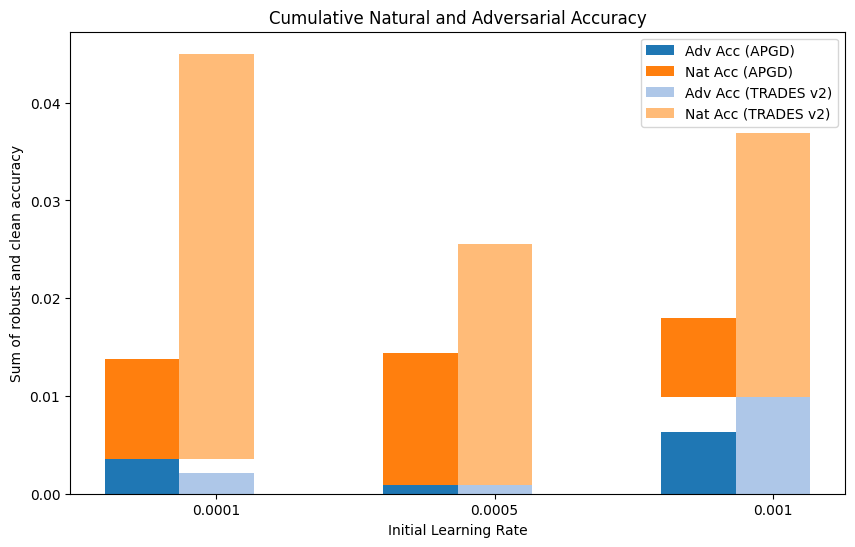

imagenet1k_robust


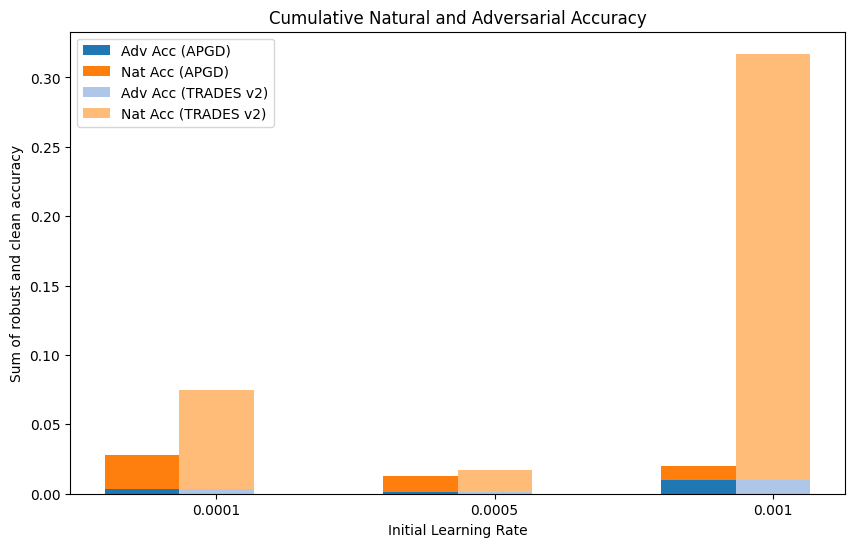

imagenet21k_non_robust


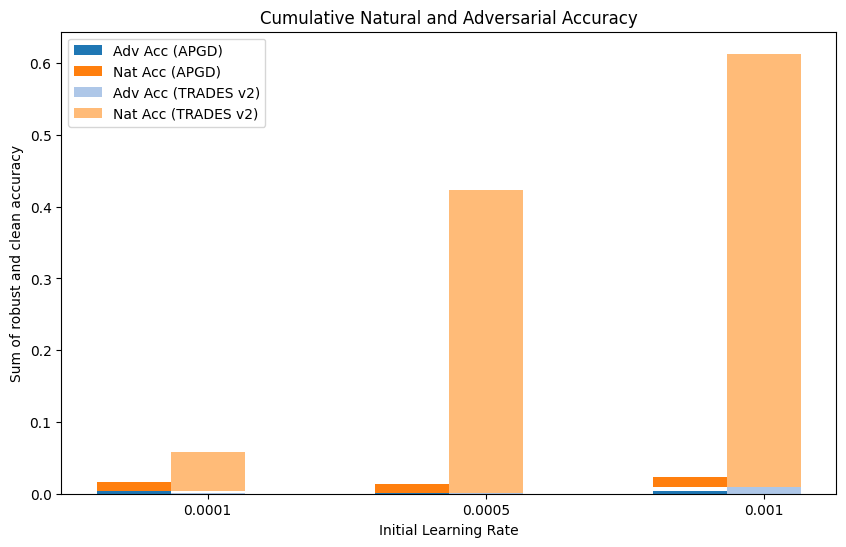

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df['combi'] = df['pre_trained']+'_'+df['loss_function']
# Convert init_lr to string to use as x labels
df['init_lr'] = df['init_lr'].astype(str)

# Get unique values for init_lr and pre_trained
init_lr_values = df['init_lr'].unique()
pre_trained_values = df['pre_trained'].unique()

# x positions for each group
x = np.arange(len(init_lr_values))

# Width of a bar
total_width = 0.8
num_bars = len(pre_trained_values)
bar_width = total_width / num_bars



# Define colors for clarity
colors = { 'adv_acc': ['#1f77b4', '#aec7e8', ], 
           'nat_acc': ['#ff7f0e', '#ffbb78', ] }

# Plotting each bar
for pre_trained in pre_trained_values:

    fig, ax = plt.subplots(figsize=(10, 6))
    print(pre_trained)
    # Positions for each bar
    
    # Filter data for the current pre_trained type

    df_pre = df[ df['pre_trained'] == pre_trained ]

    adv_acc_apgd = [df_pre[ (df_pre['init_lr'] == lr) &  (df_pre['loss_function'] == 'APGD') ]['adv_acc'].values[0] for lr in init_lr_values]
    nat_acc_apgd = [df_pre[ (df_pre['init_lr'] == lr) &  (df_pre['loss_function'] == 'APGD') ]['nat_acc'].values[0] for lr in init_lr_values]

    adv_acc_tradesv2 = [df_pre[ (df_pre['init_lr'] == lr) & (df_pre['loss_function'] == 'TRADES_v2') ]['adv_acc'].values[0] for lr in init_lr_values]
    nat_acc_tradesv2 = [df_pre[ (df_pre['init_lr'] == lr) & (df_pre['loss_function'] == 'TRADES_v2') ]['nat_acc'].values[0] for lr in init_lr_values]
    # Plot the stacked bars

    positions = x - total_width/2 + bar_width/2 
    ax.bar(positions, adv_acc_apgd, bar_width, color=colors['adv_acc'][0], label=f'Adv Acc (APGD)')
    ax.bar(positions, nat_acc_apgd, bar_width, bottom=adv_acc, color=colors['nat_acc'][0], label=f'Nat Acc (APGD)')

    positions = x - total_width/2 + bar_width/2 + bar_width
    ax.bar(positions, adv_acc_tradesv2, bar_width, color=colors['adv_acc'][1], label=f'Adv Acc (TRADES v2)' )
    ax.bar(positions, nat_acc_tradesv2, bar_width, bottom=adv_acc, color=colors['nat_acc'][1], label=f'Nat Acc (TRADES v2)' )
  

    # Customize the plot
    ax.set_xticks(x)
    ax.set_xticklabels(init_lr_values)
    ax.set_xlabel('Initial Learning Rate')
    ax.set_ylabel('Sum of robust and clean accuracy')
    ax.set_title('Cumulative Natural and Adversarial Accuracy')
    ax.legend()

    # Display the plot
    plt.show()


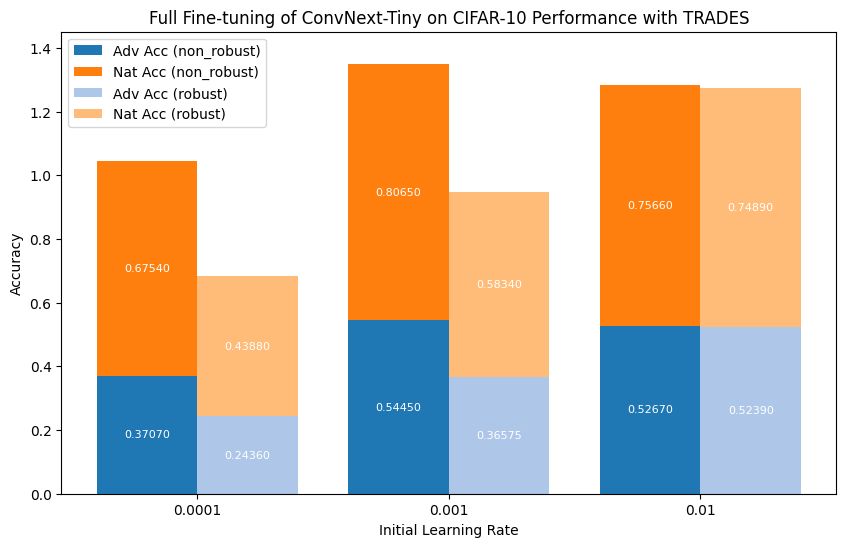

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

# Create the DataFrame with your data
data = {
    'init_lr': [0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01],
    'pre_trained': ['non_robust', 'robust', 'non_robust', 'robust', 'non_robust', 'robust'],
    'adv_acc': [0.37070, 0.24360, 0.54450, 0.36575, 0.52670, 0.52390],
    'nat_acc': [0.6754, 0.4388, 0.8065, 0.5834, 0.7566, 0.7489]
}
df = pd.DataFrame(data)

# Convert init_lr to string to use as x labels
df['init_lr'] = df['init_lr'].astype(str)

# Get unique values for init_lr and pre_trained
init_lr_values = df['init_lr'].unique()
pre_trained_values = df['pre_trained'].unique()

# x positions for each group
x = np.arange(len(init_lr_values))

# Width of a bar
total_width = 0.8
num_bars = len(pre_trained_values)
bar_width = total_width / num_bars

fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for clarity
colors = {'adv_acc': ['#1f77b4', '#aec7e8'], 'nat_acc': ['#ff7f0e', '#ffbb78']}

# Plotting each bar
for i, pre_trained in enumerate(pre_trained_values):
    # Positions for each bar
    positions = x - total_width/2 + bar_width/2 + i*bar_width
    # Filter data for the current pre_trained type
    df_pre = df[df['pre_trained'] == pre_trained]
    # Extract adv_acc and nat_acc values in the order of init_lr_values
    adv_acc = [df_pre[df_pre['init_lr'] == lr]['adv_acc'].values[0] for lr in init_lr_values]
    nat_acc = [df_pre[df_pre['init_lr'] == lr]['nat_acc'].values[0] for lr in init_lr_values]
    # Plot the stacked bars
    adv_bar = ax.bar(positions, adv_acc, bar_width, color=colors['adv_acc'][i], label=f'Adv Acc ({pre_trained})')
    nat_bar = ax.bar(positions, nat_acc, bar_width, bottom=adv_acc, color=colors['nat_acc'][i], label=f'Nat Acc ({pre_trained})')
    # Add text labels
    for j in range(len(positions)):
        # For adv_acc segment
        if adv_acc[j] > 0:
            ax.text(positions[j], adv_acc[j]/2, f'{adv_acc[j]:.5f}', ha='center', va='center', color='white', fontsize=8)
        # For nat_acc segment
        if nat_acc[j] > 0:
            total_height = adv_acc[j] + nat_acc[j]
            ax.text(positions[j], adv_acc[j] + nat_acc[j]/2, f'{nat_acc[j]:.5f}', ha='center', va='center', color='white', fontsize=8)

# Remove duplicate labels in legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(init_lr_values)
ax.set_xlabel('Initial Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Full Fine-tuning of ConvNext-Tiny on CIFAR-10 Performance with TRADES')

# Adjust y-axis limit to accommodate labels
ax.set_ylim(0, df['adv_acc'].max() + df['nat_acc'].max() + 0.1)

# Display the plot
plt.show()

